In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from matplotlib.animation import FuncAnimation

In [3]:
class grid:

    def __init__(self, start, end, n_points) -> None:
        self.x_initial = start
        self.x_final = end
        self.N = n_points
        self.dx = (end - start)/n_points

    def x_values(self):
        x = np.linspace(self.x_initial, self.x_final, self.N + 1)
        return x[1:-1]

In [4]:
def potential(x,t):
    d = 0.17
    a = 1.04
    xe = 1.4
    epsilon_0 = 0.5
    omega = 0.1

    v = d*((1-np.exp(-a*(x-xe)))**2) + x * epsilon_0 * np.cos(omega*t)

    return v

In [5]:
def T_DVR(g):
    cons = 1/((918)*(g.dx**2))
    T =  np.zeros((g.N-1, g.N-1))
    
    for i in range(g.N-1):
        for j in range(g.N-1):
            if i == j:
                T[i,j] = cons*((np.pi**2)/3 - 1/(2*((i+1)**2)))
            else:
                T[i,j] = cons*((-1)**(i-j))*((2/(i-j)**2) - (2/(i+j)**2))
    
    return T

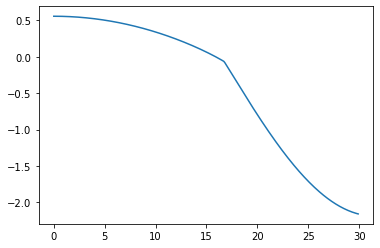

In [6]:
g = grid(-5,5,400)
x = g.x_values()
T_matrix = T_DVR(g)

eigenvalue = []

t_lis = []
for t in np.arange(0,30,0.1):
    V_matrix = np.diag(potential(x, t))
    eigenvalues, eigenvector_matrix = sl.eigh(V_matrix + T_matrix)

    state = eigenvector_matrix[:,0]
    eigenvalue.append(eigenvalues[0])

    t_lis.append(t)

plt.plot(t_lis, eigenvalue)
plt.show()

In [7]:
def state(t):
    V_matrix = np.diag(potential(x, t))
    eigenvalues, eigenvector_matrix = sl.eigh(V_matrix + T_matrix)

    state = eigenvector_matrix[:,0:2]
    time_dependent_part = np.diag(np.exp(-1.j*eigenvalues[0:2]*t))

    wave_fun = state.dot(time_dependent_part)[:,0] + state.dot(time_dependent_part)[:,1]
    return wave_fun.real

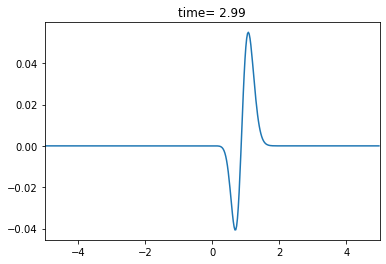

In [8]:

fig, ax = plt.subplots()

def ani_fun(t):
    ax.clear()
    ax.set_xlim(-5,5)
    ax.set_title("time= {time:.2f}".format(time = t))
    ax.plot(x, state(t))

anima = FuncAnimation(fig, ani_fun, np.arange(0,3,0.01))
anima.save('td_pot.mp4')

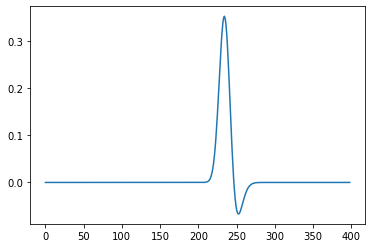

In [15]:
plt.plot(state(9).real)